In [1]:

%reload_ext XXX.mumble
%matplotlib inline

In [2]:

    from poser import *
    import Maps
    import Election

Loading maps...


HBox(children=(IntProgress(value=0, max=3), HTML(value='')))


159 Counties
Loading precinct data...


HBox(children=(IntProgress(value=0, max=159), HTML(value='')))

In [3]:

    votes = (
        Election.tidy['President of the United States']
        .reset_index()
    )
    votes['precinct'] = votes['precinct'].apply(str)
    votes = votes.set_index(['county', 'precinct'])
    print(votes.shape)
    votes.sample(3)

(8079, 2)


,,candidate,votes
county,precinct,,
Greene,Siloam,DONALD J. TRUMP,296.0
Colquitt,Funston,GARY JOHNSON,8.0
Clayton,MORROW 5,GARY JOHNSON,52.0


In [4]:

    shapes = (
        Maps.maps['vtd2016']
        .sort_values(['COUNTY_NAM', 'PRECINCT_N']))
    shapes['PRECINCT_N'] = shapes['PRECINCT_N'].map(str) 
    shapes = shapes.set_index(['COUNTY_NAM', 'PRECINCT_N'])
    shapes.sample(3)

,,ID,AREA,DATA,POPULATION,DISTRICT,CTYSOSID,PRECINCT_I,CTYNUMBER,COUNTY,CTYNAME,FIPS1,FIPS2,geometry
COUNTY_NAM,PRECINCT_N,,,,,,,,,,,,,
CRAWFORD,DISTRICT 2,964990,124.839078,761,2506,0792,0792,2,39,039,Crawford,13079,079,"POLYGON ((-83.89205 32.819558, -83.891954 32.8..."
CARROLL,HULETT,3851756,20.011636,229,2892,0451542,0451542,1542,22,022,Carroll,13045,045,"POLYGON ((-84.951802 33.639689, -84.949659 33...."
DOUGLAS,MIRROR LAKE ELEMENTA,3859000,16.946608,1027,7156,0971258,0971258,1258,48,048,Douglas,13097,097,"POLYGON ((-84.90170000000001 33.779231, -84.90..."


In [5]:

    import jellyfish
    scorers = {
        "JARO_WINKLER": jellyfish.jaro_winkler,
        "JARO": jellyfish.jaro_distance,
        # these are not very useful for our data
        # "MATCH_RATING": jellyfish.match_rating_comparison,
        # "LEVENSHTEIN": jellyfish.levenshtein_distance,
        # "HAMMING": jellyfish.hamming_distance,
        # "DAMARAU_LEVENSHTEIN": jellyfish.damerau_levenshtein_distance,
    }
    
    def get_closest_match(needle, haystack, scorer=scorers["JARO_WINKLER"]):
        best = ""
        best_score = 0
        needle = f"{needle}".upper().strip()

        for straw in haystack:
            try:
                score = scorer(needle, f"{straw}".upper().strip())
                if score > best_score:
                    best_score = score
                    best = straw
            except:
                print("FAIL", straw, needle)

        return best

In [237]:

    def index_to_dict(df):
        the_dict = the.collections.defaultdict()(set)
        for k, v in df.index.tolist():
            the_dict[k] = set([v]).union(the_dict[k])
        return the_dict

In [251]:
    
    uvote_county = votes.index.get_level_values(0).unique().dropna()
    uvote_precincts = index_to_dict(votes);

In [240]:
    shape_counties = the.pandas.DataFrame()(shapes.index.get_level_values(0).unique()).dropna().set_index('COUNTY_NAM')
    shape_counties.sample(3)

    shape_counties = the.pandas.DataFrame()(shapes.index.get_level_values(0).unique()).dropna().set_index('COUNTY_NAM')
    shape_counties.sample(3)

""
COUNTY_NAM
BULLOCH
MADISON
LANIER


In [241]:

    for name, scorer in the.tqdm.tqdm_notebook()(list(scorers.items())):
        shape_counties[f'NORM_COUNTY_{name}'] = shape_counties.index.get_level_values(0).map(lambda x: get_closest_match(x, uvote_county, scorer))
    shape_counties.sample(3)

HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO
COUNTY_NAM,,
TALIAFERRO,Taliaferro,Taliaferro
CHARLTON,Charlton,Charlton
WHITE,White,White


In [242]:
    shape_counties[shape_counties['NORM_COUNTY_JARO_WINKLER'] != shape_counties['NORM_COUNTY_JARO']]

    shape_counties[shape_counties['NORM_COUNTY_JARO_WINKLER'] != shape_counties['NORM_COUNTY_JARO']]

,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO
COUNTY_NAM,,


In [257]:

    shapes_county_guess = shapes.join(shape_counties).dropna()
    shapes_county_guess.sample(3)

,,ID,AREA,DATA,POPULATION,DISTRICT,CTYSOSID,PRECINCT_I,CTYNUMBER,COUNTY,CTYNAME,FIPS1,FIPS2,geometry,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO
COUNTY_NAM,PRECINCT_N,,,,,,,,,,,,,,,
LEE,#10 REDBONE,554368,38.422243,2052,6054,17710,17710,10,88,088,Lee,13177,177,"POLYGON ((-84.13900700000001 31.622873, -84.14...",Lee,Lee
FULTON,AP04A,5074774,0.889996,1384,1848,121AP04A,121AP04A,AP04A,60,060,Fulton,13121,121,"POLYGON ((-84.35283200000001 34.079107, -84.35...",Fulton,Fulton
JONES,HAWKINS,1938801,23.049114,2015,4220,16910,16910,10,84,084,Jones,13169,169,"POLYGON ((-83.548677 32.863427, -83.54868 32.8...",Jones,Jones


In [258]:

    shapes_county_guess['PRECINCT_N'] = shapes_county_guess.index.get_level_values(1)
    for name, scorer in the.tqdm.tqdm_notebook()(list(scorers.items())):
        col_name = f"NORM_PRECINCT_{name}"
        normed = the.pandas.DataFrame()(shapes_county_guess.apply(
            lambda row: (
                get_closest_match(row['PRECINCT_N'], uvote_precincts[row['NORM_COUNTY_JARO_WINKLER']], scorer)
            ),
            axis=1)).rename(columns={0: col_name})
        shapes_county_guess = shapes_county_guess.join(normed)

HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

In [259]:
    shapes_county_guess[shapes_county_guess['NORM_PRECINCT_JARO'] != shapes_county_guess['NORM_PRECINCT_JARO_WINKLER']]

    shapes_county_guess[shapes_county_guess['NORM_PRECINCT_JARO'] != shapes_county_guess['NORM_PRECINCT_JARO_WINKLER']]

,,ID,AREA,DATA,POPULATION,DISTRICT,CTYSOSID,PRECINCT_I,CTYNUMBER,COUNTY,CTYNAME,FIPS1,FIPS2,geometry,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO,PRECINCT_N,NORM_PRECINCT_JARO_WINKLER,NORM_PRECINCT_JARO
COUNTY_NAM,PRECINCT_N,,,,,,,,,,,,,,,,,,
DOUGLAS,BEULAH BAPTIST CHURCH,3885623,7.812773,1039,5123,097731,097731,731,48,048,Douglas,13097,097,"POLYGON ((-84.72413899999999 33.80617, -84.724...",Douglas,Douglas,BEULAH BAPTIST CHURCH,BEULAH,EPHESUS BAPTIST CHUR


In [262]:

    unjoined = shapes_county_guess[shapes_county_guess['NORM_PRECINCT_JARO'] == '']
    print("Couldn't find", unjoined.shape[0])
    unjoined

Couldn't find 22


ID        AREA  DATA  POPULATION DISTRICT  \
COUNTY_NAM PRECINCT_N                                                   
BLECKLEY   1           1754047  219.266020   138       13063     0231   
SPALDING   01          1015655    9.634308  2462        3019    25517   
           02           816003   14.745911  2460         829    25515   
           03           994266    3.798000  2473        2268    25508   
           04          1089620   19.670335  2474        2656    25509   
           05           994154   11.109448  2455        3245    25510   
           06           998189    3.000344  2471        4699    25506   
           07          1015584    4.541419  2463        2322    25518   
           08          1025551   16.661145  2458        3670    25513   
           09          1063865   17.574562  2467        3170    25521   
           10          1015495    1.352489  2465        3276    25502   
           11           989165   22.014154  2464        3714    25519   
           12          1010402    1.901409  2472        2075    25507   
           13          1010473   13.127775  2456        3018    25511   
           14           998306    4.647681  2461        4259    25516   
           15           989093   20.038315  2457        2143    25512   
           16          1025485   15.848321  2466        3067    25520   
           17          1010601    1.391477  2454        4198    25501   
           18          1015373    1.737199  2468        1822    25503   
           19          1054638   12.448825  2459        3210    25514   
           20          1010696    0.968705  2469        1678    25504   
           21           994332    3.465495  2470        5735    25505   

                      CTYSOSID PRECINCT_I CTYNUMBER COUNTY   CTYNAME  FIPS1  \
COUNTY_NAM PRECINCT_N                                                         
BLECKLEY   1              0231          1        12    012  Bleckley  13023   
SPALDING   01            25517         17       126    126  Spalding  13255   
           02            25515         15       126    126  Spalding  13255   
           03            25508         08       126    126  Spalding  13255   
           04            25509         09       126    126  Spalding  13255   
           05            25510         10       126    126  Spalding  13255   
           06            25506         06       126    126  Spalding  13255   
           07            25518         18       126    126  Spalding  13255   
           08            25513         13       126    126  Spalding  13255   
           09            25521         21       126    126  Spalding  13255   
           10            25502         02       126    126  Spalding  13255   
           11            25519         19       126    126  Spalding  13255   
           12            25507         07       126    126  Spalding  13255   
           13            25511         11       126    126  Spalding  13255   
           14            25516         16       126    126  Spalding  13255   
           15            25512         12       126    126  Spalding  13255   
           16            25520         20       126    126  Spalding  13255   
           17            25501         01       126    126  Spalding  13255   
           18            25503         03       126    126  Spalding  13255   
           19            25514         14       126    126  Spalding  13255   
           20            25504         04       126    126  Spalding  13255   
           21            25505         05       126    126  Spalding  13255   

                      FIPS2  \
COUNTY_NAM PRECINCT_N         
BLECKLEY   1            023   
SPALDING   01           255   
           02           255   
           03           255   
           04           255   
           05           255   
           06           255   
           07           255   
           08           255   
           09           255   
      

In [263]:

    shapes_county_guess['county'] = shapes_county_guess['NORM_COUNTY_JARO_WINKLER']
    shapes_county_guess['precinct'] = shapes_county_guess['NORM_PRECINCT_JARO_WINKLER']
    shapes_county_guess = shapes_county_guess.set_index(['county', 'precinct'])
    print(shapes_county_guess.shape)
    shapes_county_guess.sample(3)

(2677, 18)


,,ID,AREA,DATA,POPULATION,DISTRICT,CTYSOSID,PRECINCT_I,CTYNUMBER,COUNTY,CTYNAME,FIPS1,FIPS2,geometry,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO,PRECINCT_N,NORM_PRECINCT_JARO_WINKLER,NORM_PRECINCT_JARO
county,precinct,,,,,,,,,,,,,,,,,,
Emanuel,Blundale,2648483,81.330603,1092,1055,1071208,1071208,1208,53,053,Emanuel,13107,107,"POLYGON ((-82.37570599999999 32.799234, -82.37...",Emanuel,Emanuel,BLUNDALE,Blundale,Blundale
Hart,Hartwell,5902583,44.140803,1891,9956,1472,1472,2,73,073,Hart,13147,147,"POLYGON ((-82.82239 34.34671, -82.822520999999...",Hart,Hart,HARTWELL,Hartwell,Hartwell
Fulton,03N,4071320,0.692259,2765,3330,12103N,12103N,03N,60,060,Fulton,13121,121,"POLYGON ((-84.41297299999999 33.779929, -84.41...",Fulton,Fulton,03N,03N,03N


In [264]:

    trump = votes[votes['candidate'].str.contains('TRUMP')]
    clinton = votes[votes['candidate'].str.contains('CLINTON')]
    trump.shape, clinton.shape

((2693, 2), (2693, 2))

In [265]:

    red = trump[trump['votes'] > clinton['votes']].dropna()
    red['color'] = 'red';
    red.shape

(1592, 3)

In [266]:

    blue = clinton[clinton['votes'] > trump['votes']].dropna()
    blue['color'] = 'blue';
    blue.shape

(1099, 3)

In [267]:

    red_blue = the.pandas.concat()([blue, red])
    red_blue['county'] = red_blue.index.get_level_values(0)
    red_blue['precinct'] = red_blue.index.get_level_values(1)
    red_blue.shape

(2691, 5)

In [268]:

    joined = the.geopandas.GeoDataFrame()(red_blue.join(
        shapes_county_guess, 
        on=['county', 'precinct'],
        rsuffix='_shape',
    ))
    red_blue.shape, joined.shape, joined.dropna().shape

((2691, 5), (2757, 23), (2653, 23))

In [270]:
    joined.sample(10)

    joined.sample(10)

,,candidate,votes,color,county,precinct,ID,AREA,DATA,POPULATION,DISTRICT,...,COUNTY,CTYNAME,FIPS1,FIPS2,geometry,NORM_COUNTY_JARO_WINKLER,NORM_COUNTY_JARO,PRECINCT_N,NORM_PRECINCT_JARO_WINKLER,NORM_PRECINCT_JARO
county,precinct,,,,,,,,,,,,,,,,,,,,,
Carroll,LOWELL (1163),DONALD J. TRUMP,770.0,red,Carroll,LOWELL (1163),364143.0,30.160393,222.0,2080.0,0451163,...,022,Carroll,13045,045,"POLYGON ((-85.100763 33.502979, -85.10041 33.5...",Carroll,Carroll,LOWELL,LOWELL (1163),LOWELL (1163)
Chatham,3-05 Aldersgate Youth Center,HILLARY CLINTON,733.0,blue,Chatham,3-05 Aldersgate Youth Center,3288342.0,3.652771,335.0,2483.0,0517-13C,...,025,Chatham,13051,051,"POLYGON ((-81.24499299999999 32.07424, -81.242...",Chatham,Chatham,GARDEN CITY CITY HAL,3-05 Aldersgate Youth Center,3-05 Aldersgate Youth Center
Fulton,03G,HILLARY CLINTON,302.0,blue,Fulton,03G,4566388.0,0.169169,1242.0,606.0,12103G,...,060,Fulton,13121,121,"POLYGON ((-84.41262 33.762552, -84.41260699999...",Fulton,Fulton,03G,03G,03G
Columbia,Col Cty Bd Of Edu,DONALD J. TRUMP,972.0,red,Columbia,Col Cty Bd Of Edu,2892410.0,3.545471,710.0,2648.0,073060,...,036,Columbia,13073,073,"POLYGON ((-82.152215 33.533554, -82.152198 33....",Columbia,Columbia,COL CTY BOARD OF EDU,Col Cty Bd Of Edu,Col Cty Bd Of Edu
Burke,Alexander,DONALD J. TRUMP,140.0,red,Burke,Alexander,2808394.0,40.226031,176.0,538.0,0330001,...,017,Burke,13033,033,"POLYGON ((-81.788281 33.029791, -81.788348 33....",Burke,Burke,ALEXANDER,Alexander,Alexander
Fulton,SS13A,HILLARY CLINTON,487.0,blue,Fulton,SS13A,4703266.0,0.530874,1560.0,2839.0,121SS13A,...,060,Fulton,13121,121,"POLYGON ((-84.378168 33.893535, -84.37418 33.8...",Fulton,Fulton,SS13A,SS13A,SS13A
Colquitt,Shaw,HILLARY CLINTON,1089.0,blue,Colquitt,Shaw,1229455.0,8.070663,659.0,6648.0,0710001,...,035,Colquitt,13071,071,"POLYGON ((-83.802148 31.216598, -83.8009 31.21...",Colquitt,Colquitt,SHAW,Shaw,Shaw
Talbot,ONEAL,HILLARY CLINTON,230.0,blue,Talbot,ONEAL,713403.0,55.595079,2491.0,753.0,26301,...,130,Talbot,13263,263,"POLYGON ((-84.703169 32.699013, -84.7031960000...",Talbot,Talbot,ONEAL,ONEAL,ONEAL
Elbert,Elberton,DONALD J. TRUMP,1149.0,red,Elbert,Elberton,5885629.0,16.080538,1081.0,6879.0,105189,...,052,Elbert,13105,105,"POLYGON ((-82.81742300000001 34.110892, -82.81...",Elbert,Elbert,ELBERTON,Elberton,Elberton


    joined.plot(column='color', cmap='bwr');

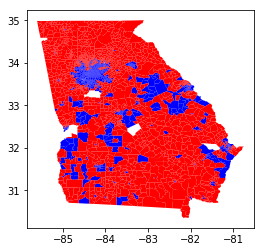

In [271]:
    joined.plot(column='color', cmap='bwr');